<a href="https://colab.research.google.com/github/bksaini078/Computational-Social-Science/blob/master/WebScrappingAndDataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research on Happiness score of countries using web scrapping and data scrapping from English Wikipedia website



# Data Collection

Collect the name of all the countries per continent from English Wikipedia.

In [0]:
# https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report
# https://simple.wikipedia.org/wiki/List_of_countries_by_continents
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

link_happiness= 'https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report'
link_country= 'https://simple.wikipedia.org/wiki/List_of_countries_by_continents'
page = requests.get(link_country)


In [0]:
soup = BeautifulSoup(page.content, 'html.parser')
#for continent
continent_list= soup.find_all('span', {'class' :"mw-headline"})
continent_list[1].get_text()
# for countries 
un_list=soup.find_all('ul')

### **Create countries-continents dataframe, this dataframe should have two columns: country , continent.**






In [5]:
#creating dataframe 
df= pd.DataFrame(columns=['Country', 'Continent'])

i=0
for ls_country in un_list:
        # print(ls_country.find('li').get_text())
        
        # print("**************************")

        if continent_list[i].get_text() in ls_country.find('li').get_text() and '/' not in continent_list[i].get_text()   :
            continue
        else:
            # print(continent_list[i].get_text())
            #as antarctica doesnot any country
            if continent_list[i].get_text() == 'Antarctica':
                i=1+1
            # print(continent_list[i].get_text())
            list_country= ls_country.find_all('li')
            for country in list_country:
                # print(country.get_text())
                
                countryx= (str(country.get_text().split('-')[0]))
                if '(' in countryx :
                    countryx= countryx.split('(')[0]
                countryx=countryx.strip()
                countryx=countryx.replace('**','')
                if '/' in continent_list[i].get_text():
                    # print(continent_list[i].get_text())
                    continent=continent_list[i].get_text().split('/')[1]
                    df=df.append([{'Country':countryx.strip(),'Continent': continent }])
                else:
                    df=df.append([{'Country':countryx.strip(),'Continent': continent_list[i].get_text() }])
                # print(countryx)
                # print(i)
            if i==6:
                break
            i=i+1

df=df.reset_index(drop=True) 
df['Country']=df['Country'].astype(str)
df.to_csv('coun-con.csv')
df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
219,Samoa,Australia
220,Solomon Islands,Australia
221,Tonga,Australia
222,Tuvalu,Australia


### Collect the happiness score, GDP per capital, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption per country in 2019 from English Wikipedia and put all collected information in a dataframe .







In [0]:
page = requests.get(link_happiness)
soup = BeautifulSoup(page.content, 'html.parser')
tables=soup.findAll('table' ,"wikitable sortable")
country=[]
score=[]
gdp=[]
social_support=[]
hle=[]
freedom=[]
generosity=[]
corruption=[]
#taking 2019 table only 
rows = tables[0].find_all('tr')
# print(rows)
for row in rows:
     #  print(row)
    cells = row.find_all('td')
    if len(cells) > 1:
        #  print(str(cells[1].find('a').get_text()))
        # print(cells[0])
        country_w=str(cells[1].find('a').get_text())
        # x=country_w.split(' ')
        # if len(x)>2:
        #     print(x)
        #     country_w=x[0]+' '+ x[1]
        country.append(country_w)
        score.append(float(cells[2].get_text()))
        gdp.append(float(cells[3].get_text()))
        social_support.append(float(cells[4].get_text()))
        hle.append(float(cells[5].get_text()))
        freedom.append(float(cells[6].get_text()))
        generosity.append(float(cells[7].get_text()))
        corruption.append(float(cells[8].get_text()))
             



In [7]:
#creating DataFrame
df_happy = pd.DataFrame(columns=['Country','Happiness_Score','GDP','Social_Support','Healthy_Life_Expectency','Freedom_life_Choices','Generosity','Corruption'])
#adding data
df_happy['Country']=country
df_happy['Happiness_Score']=score
df_happy['GDP']=gdp
df_happy['Social_Support']=social_support
df_happy['Healthy_Life_Expectency']=hle
df_happy['Freedom_life_Choices']=freedom
df_happy['Generosity']=generosity
df_happy['Corruption']=corruption
df_happy


,Country,Happiness_Score,GDP,Social_Support,Healthy_Life_Expectency,Freedom_life_Choices,Generosity,Corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Create a new dataframe with all the information that you collected and save it in a CSV file.

In [120]:
new_dataframe= df_happy.add
merged_df = pd.merge(left=df_happy, right=df, how='right', left_on='Country', right_on='Country')
new_df=merged_df.dropna()
#saving file in csv format
new_df.to_csv('Country_Data.csv')

new_df=new_df.sort_values('Country')

new_df

,Country,Happiness_Score,GDP,Social_Support,Healthy_Life_Expectency,Freedom_life_Choices,Generosity,Corruption,Continent
143,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
100,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Europe
83,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Africa
44,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,South America
108,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Asia
...,...,...,...,...,...,...,...,...,...
101,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,South America
89,Vietnam,5.175,0.741,1.346,0.851,0.543,0.147,0.073,Asia
140,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Asia
127,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,Africa


# Data Visualisation


1.   Plot the distribution of happiness score per country. Find the top 10 happiest countries.
2. What is the average of happiness.
3. What are the countries below the median.
4. Plot the correlation between different variables and give an interpretation. for each continent, give the happiest country.

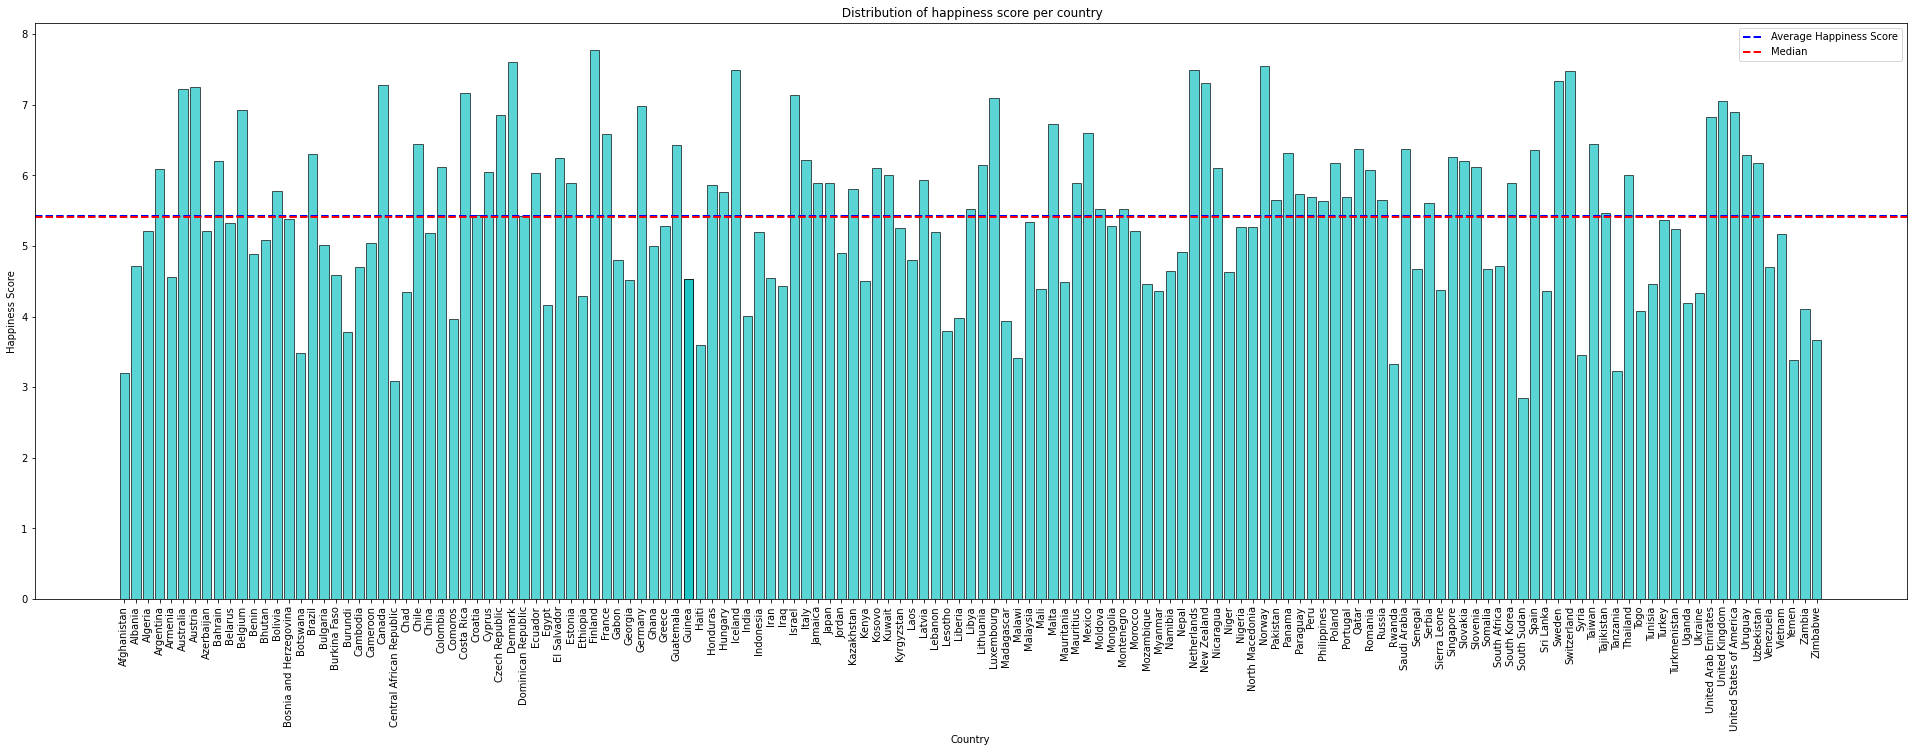

In [121]:
# Plot the distribution of happiness score per country. 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[26,8])

#What is the average of happiness.
average_happiness=new_df['Happiness_Score'].mean()

## What are the countries below the median.
median=new_df['Happiness_Score'].median()

ax = fig.add_axes([0,0,1,1])
ax.bar(new_df['Country'],new_df['Happiness_Score'],color='c', edgecolor='k', alpha=0.65)

plt.axhline(average_happiness,color='b', linestyle='dashed', linewidth=2, label='Average')
plt.axhline(median,color='r', linestyle='dashed', linewidth=2, label='Average')

plt.legend(['Average Happiness Score','Median'])
# plt.axvline(average_happiness,color='b', linestyle='dashed', linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title(' Distribution of happiness score per country')
plt.show()

In [122]:
#Find the top 10 happiest countries.
new_df=new_df.sort_values('Happiness_Score' ,ascending=False)
top_ten = list(new_df['Country'].head(10))
print('Top Ten country based on Happiness Score : \n',top_ten)
print('Average Happiness Score:', average_happiness)
print('Median Happiness Score:', median)

Top Ten country based on Happiness Score : 
 ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria']
Average Happiness Score: 5.422027397260275
Median Happiness Score: 5.4055


In [123]:
#Countries below median 
country_below_median = new_df.where(new_df['Happiness_Score']< median)
country_below_median=country_below_median.dropna().reset_index(drop=True)
print('Countries below median are :',country_below_median['Country'])

Countries below median are : 0       Bosnia and Herzegovina
1                       Turkey
2                     Malaysia
3                      Belarus
4                       Greece
                ...           
68                      Rwanda
69                    Tanzania
70                 Afghanistan
71    Central African Republic
72                 South Sudan
Name: Country, Length: 73, dtype: object


In [124]:
#for each continent, give the happiest country.
continent_happiest=new_df.groupby('Continent').max()
print('For each continent, happiest country is :',continent_happiest.Country)

For each continent, happiest country is : Continent
Africa                           Zimbabwe
Asia                                Yemen
Australia                     New Zealand
Europe                     United Kingdom
North America    United States of America
South America                   Venezuela
Name: Country, dtype: object


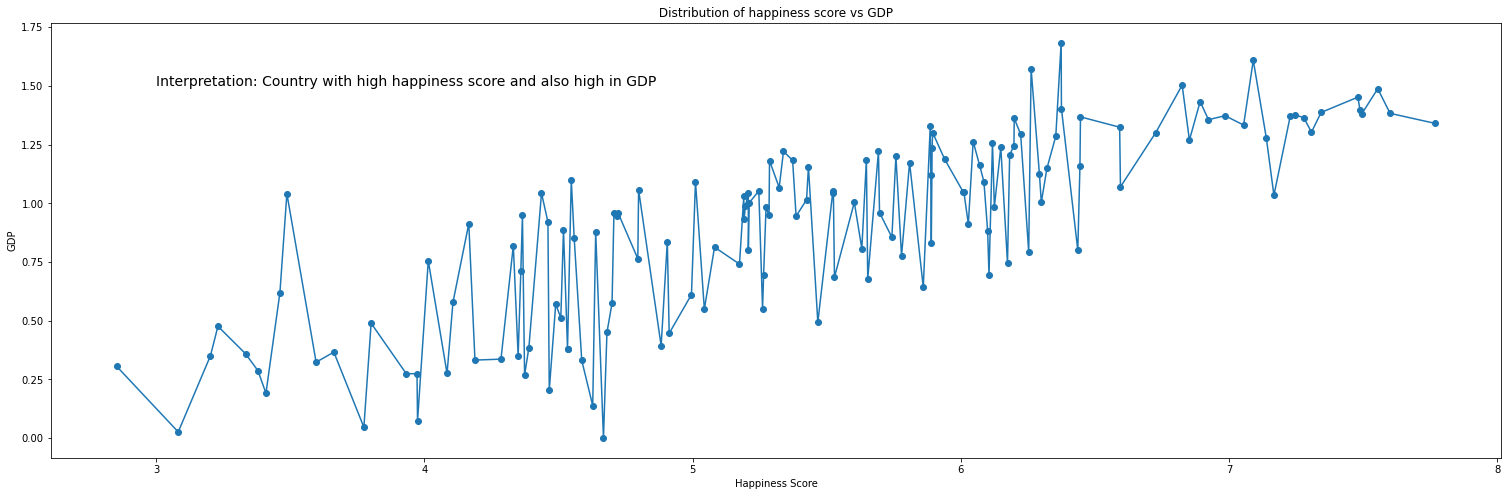

Interpretation: Country with high happiness score and also high in GDP


In [126]:
# Plot the correlation between different variables and give an interpretation. 
# Happiness and GDP
fig = plt.figure(figsize=[26,8])

plt.plot(new_df.Happiness_Score,new_df.GDP,'o-')
# plt.plot(new_df.Happiness_Score,new_df.Healthy_Life_Expectency,'y-')
# plt.plot(new_df.Happiness_Score,new_df.Social_Support,'k-')
plt.xlabel("Happiness Score")
plt.ylabel("GDP")
plt.title(' Distribution of happiness score vs GDP ')
plt.text(3,1.50,'Interpretation: Country with high happiness score and also high in GDP relatively',fontsize=14, color='k')
plt.show()
print('Interpretation: Country with high happiness score and also high in GDP')

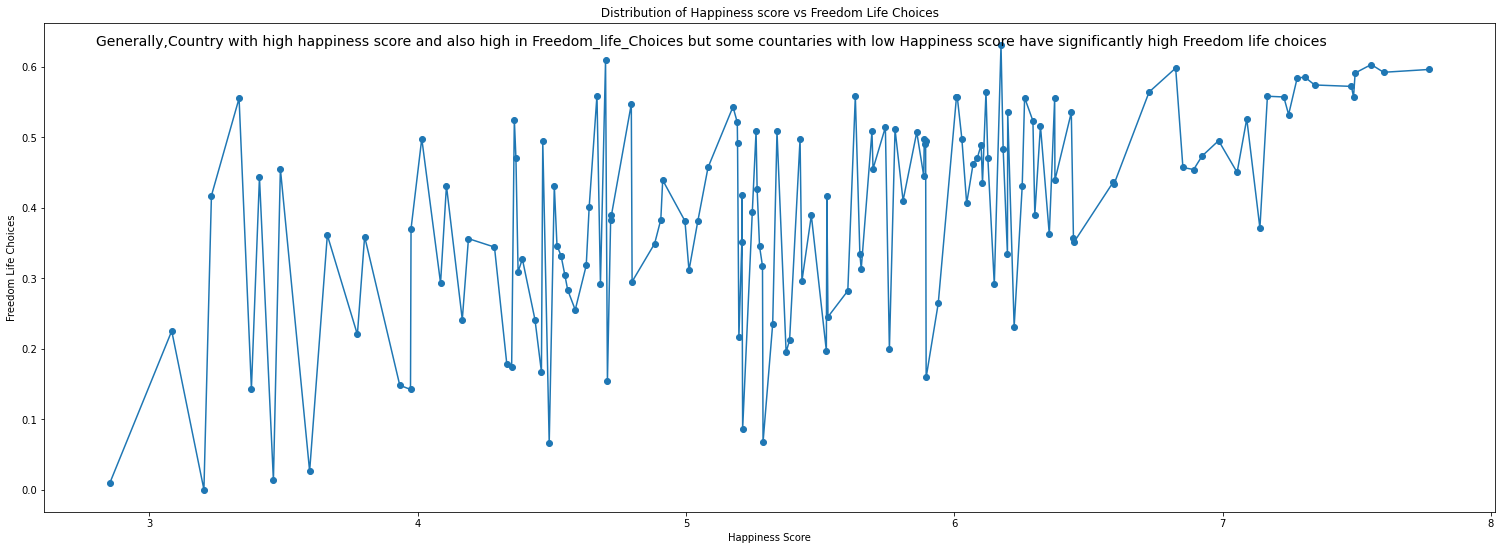

In [127]:
fig = plt.figure(figsize=[26,9])

plt.plot(new_df.Happiness_Score,new_df.Freedom_life_Choices,'o-')
s='Generally,Country with high happiness score and also high in Freedom_life_Choices but some countaries with low Happiness score have significantly high Freedom life choices'
plt.xlabel("Happiness Score")
plt.ylabel("Freedom Life Choices")
plt.title(' Distribution of Happiness score vs Freedom Life Choices ')
plt.text(2.8,0.63,s,fontsize=14, color='k')
plt.show()


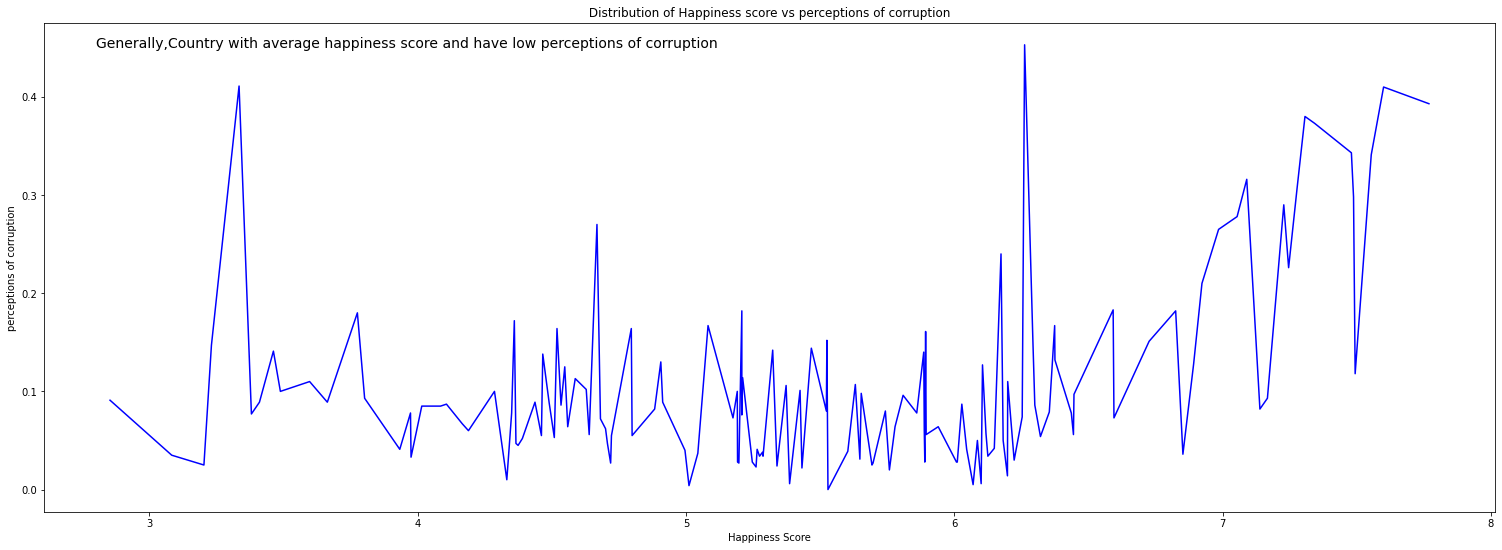

In [130]:
fig = plt.figure(figsize=[26,9])

plt.plot(new_df.Happiness_Score,new_df.Corruption,'b-')
s='Generally,Country with average happiness score and have low perceptions of corruption'
plt.xlabel("Happiness Score")
plt.ylabel("perceptions of corruption")
plt.title(' Distribution of Happiness score vs perceptions of corruption ')
plt.text(2.8,0.45,s,fontsize=14, color='k')
plt.show()


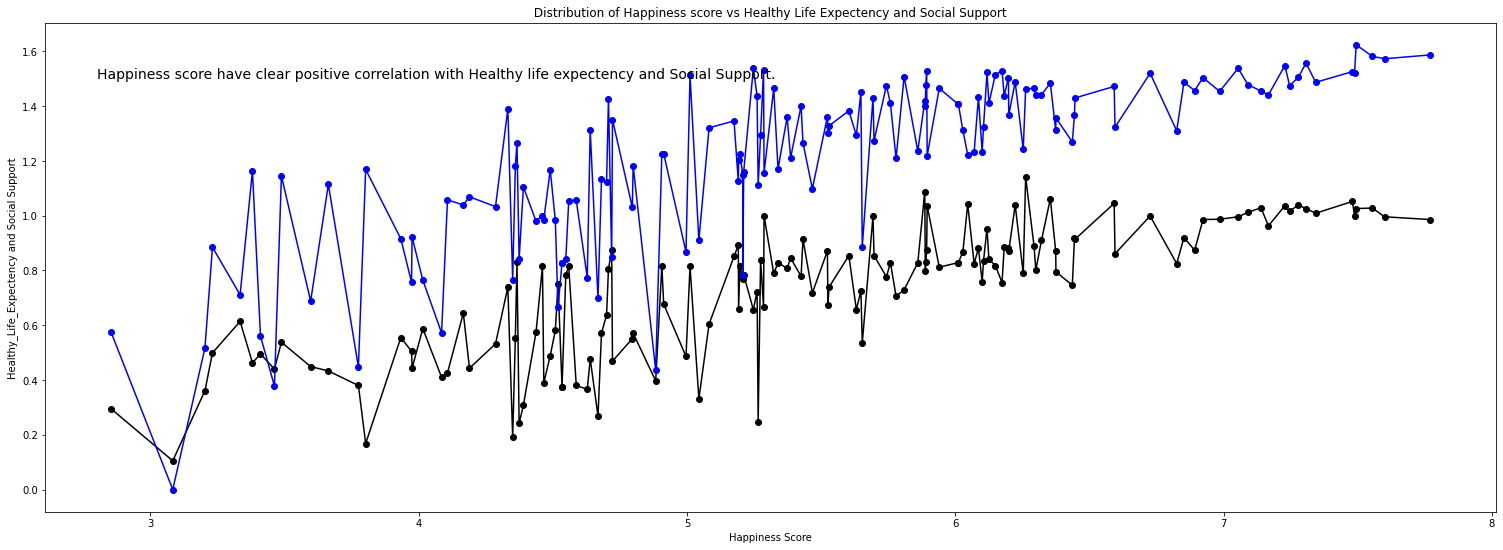

In [149]:
fig = plt.figure(figsize=[26,9])

plt.plot(new_df.Happiness_Score,new_df.Healthy_Life_Expectency,'o-',color='k')
plt.plot(new_df.Happiness_Score,new_df.Social_Support,'o-',color='b')
s='Happiness score have clear positive correlation with Healthy life expectency and Social Support.'
plt.xlabel("Happiness Score")
plt.ylabel("Healthy_Life_Expectency and Social Support")
plt.title(' Distribution of Happiness score vs Healthy Life Expectency and Social Support ')
plt.text(2.8,1.5,s,fontsize=14, color='k')
plt.show()

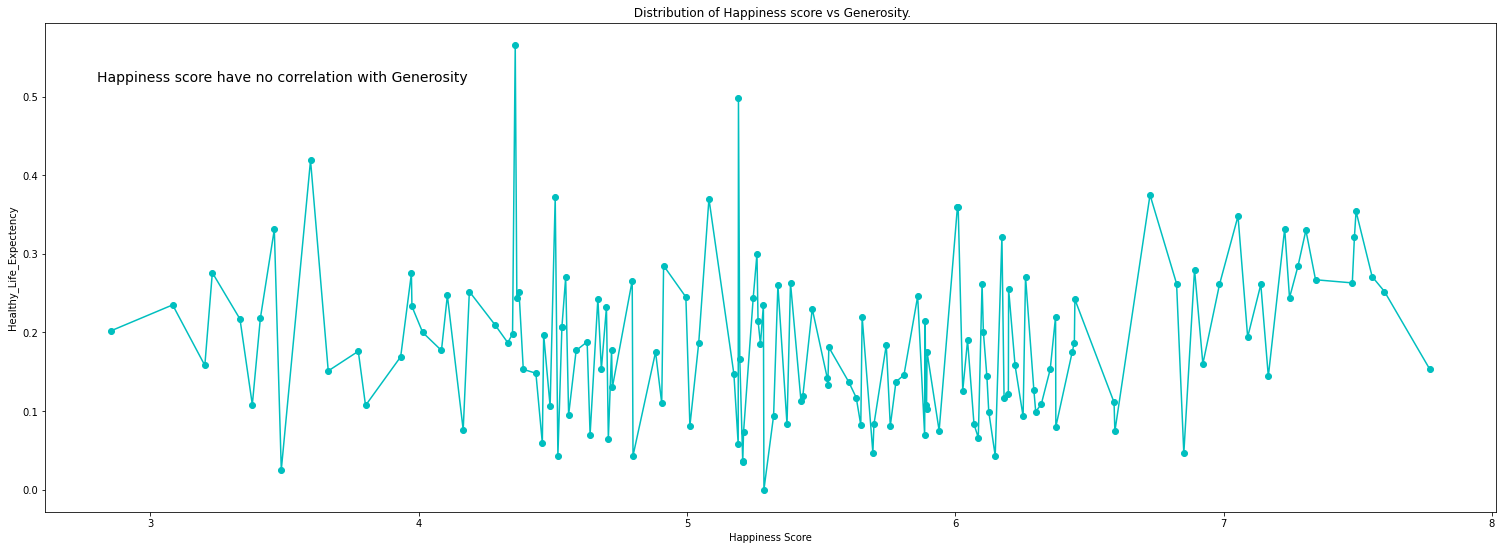

In [161]:
fig = plt.figure(figsize=[26,9])

plt.plot(new_df.Happiness_Score,new_df.Generosity,'o-',color='c')
s='Happiness score have no correlation with Generosity'
plt.xlabel("Happiness Score")
plt.ylabel("Healthy_Life_Expectency")
plt.title(' Distribution of Happiness score vs Generosity.')
plt.text(2.8,0.52,s,fontsize=14, color='k')
plt.show()

# Extra Question

Collect The 3 alpha code for each country and plot the happiness score in the world map by using plotly library.

In [0]:
# getting 3 alpha code 
link3='https://www.iban.com/country-codes'
page = requests.get(link3)
soup = BeautifulSoup(page.content, 'html.parser')
tables=soup.findAll('table' ,"table table-bordered downloads tablesorter")
country=[]
alpha_code=[]

rows = tables[0].find_all('tr')
# print(rows)
for row in rows:
     #  print(row)
    cells = row.find_all('td')
    if len(cells) > 1:
        country_s = str(cells[0].get_text()).strip().split('(')[0]
        country.append(country_s)
        alpha_code.append(str(cells[2].get_text().strip()))

#creating data frame 
df_alpha = pd.DataFrame(columns=['Country','Alpha_3_Code'])
df_alpha.Country=country
df_alpha.Alpha_3_Code=alpha_code


In [198]:
#with aplha code
df_alpha_new = pd.merge(left=new_df, right=df_alpha, how='right', left_on='Country', right_on='Country')
df_alpha_new=df_alpha_new.dropna()
df_alpha_new.to_csv('withalpha.csv')
df_alpha_new

,Country,Happiness_Score,GDP,Social_Support,Healthy_Life_Expectency,Freedom_life_Choices,Generosity,Corruption,Continent,Alpha_3_Code
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,FIN
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,DNK
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,NOR
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,ISL
4,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe,CHE
...,...,...,...,...,...,...,...,...,...,...
118,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,Africa,MWI
119,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Asia,YEM
120,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa,RWA
121,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia,AFG


In [213]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = df_alpha_new.Alpha_3_Code,
    z = df_alpha_new.Happiness_Score,
    text = df_alpha_new.Country,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Happiness Score',
))

fig.update_layout(
    title_text='Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Happiness Score of Country',
        showarrow = False
    )]
)

fig.show()